<a href="https://colab.research.google.com/github/Aarthi0510/Time-series-/blob/main/Time_series_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-39c9ff8edc68>:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  t = pd.to_datetime(data['Date']).apply(lambda x: x.timestamp())


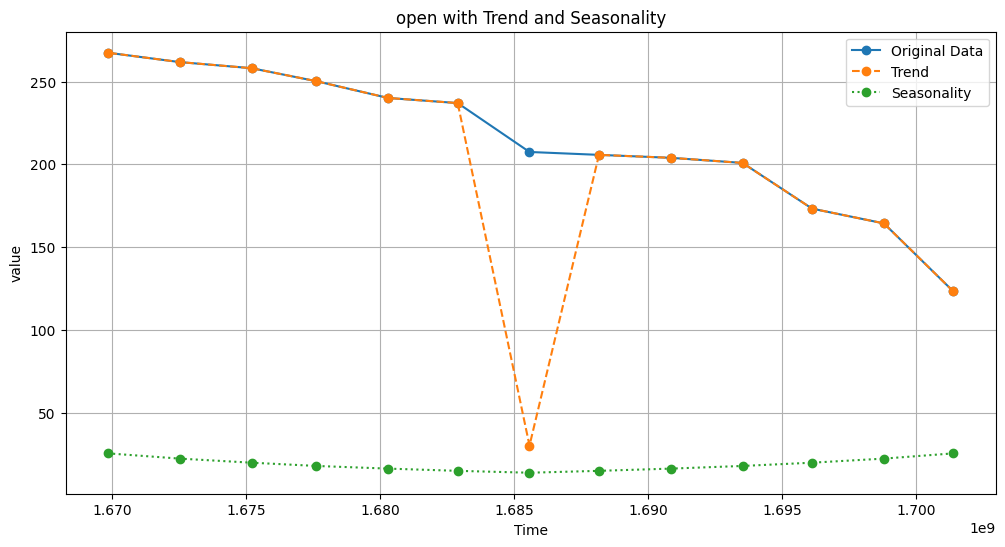

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def calculate_trend(xt, t):
    n = len(xt)
    q = int((n - 1) / 2)
    d = 2 * q + 1
    trend = []
    for i in range(n):
        if n % 2 == 1:  # odd
            if i < q or i >= n - q:  # handle edge cases
                mt = xt[i]
            else:
                mt = (1 / (2 * q + 1)) * (xt[i - q] + xt[i + q])
        else:  # even
            sum_xt = 0
            count = 0
            for j in range(-q, q + 1):
                if 0 <= i + j < n:  # handle edge cases
                    sum_xt += xt[i + j]
                    count += 1
            mt = sum_xt / count
        trend.append(mt)
    return trend


def calculate_seasonality(xt, trend, t):
    n = len(xt)
    q = int((n - 1) / 2)
    seasonality = []
    for k in range(n):
        sum_xk = 0
        count = 0
        for j in range(-q, q + 1):
            if 0 <= k + j < n:  # handle edge cases
                sum_xk += xt[k + j] - trend[k + j]
                count += 1
        if count > 0:
            wk = sum_xk / count
        else:
            wk = 0
        seasonality.append(wk)
    return seasonality


data = pd.read_csv("/content/tesla month stock new.csv")


xt = data['Close']
t = pd.to_datetime(data['Date']).apply(lambda x: x.timestamp())

trend = calculate_trend(xt, t)
seasonality = calculate_seasonality(xt, trend, t)


plt.figure(figsize=(12, 6))
plt.plot(t, xt, label='Original Data', marker='o')
plt.plot(t, trend, label='Trend', marker='o', linestyle='--')
plt.plot(t, seasonality, label='Seasonality', marker='o', linestyle=':')
plt.title('open with Trend and Seasonality')
plt.xlabel('Time')
plt.ylabel('value')
plt.legend()
plt.grid(True)
plt.show()